In [350]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

- The first line is specific to jupyter notebook, figures are displayed under cell
- numpy module is always imported like this, every numpy command begin by np.
- pyplot is a matplotlib subpackage similar to the matlab interface
- We set the size of all figures to 10cm x 6cm

# What provide Numpy to Python ?

- `ndarray` multi-dimensional array object
- derived objects such as masked arrays and matrices
- `ufunc` fast array mathematical operations.
- Offers some Matlab-ish capabilities within Python
- Initially developed by [Travis Oliphant](https://www.continuum.io/people/travis-oliphant).
- Numpy 1.0 released October, 2006.
- The [SciPy.org website](https://docs.scipy.org/doc/numpy) is very helpful.
- NumPy fully supports an object-oriented approach.

# Routines for fast operations on arrays.

    - shape manipulation
    - sorting
    - I/O
    - FFT
    - basic linear algebra
    - basic statistical operations
    - random simulation
    - statistics
    - and much more...

# Getting Started with NumPy

- It is handy to import everything from NumPy into a Python console:
```python
from numpy import *
```
- But it is easier to read and debug if you use explicit imports.
```python
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
```

In [351]:
import numpy as np
print(np.__version__)

1.18.1


# Why Arrays ?

- Python lists are slow to process and use a lot of memory.
- For tables, matrices, or volumetric data, you need lists of lists of lists... which becomes messy to program.

In [352]:
from random import random
from operator import truediv

In [353]:
l1 = [random() for i in range(1000)]
l2 = [random() for i in range(1000)]
%timeit s = sum(map(truediv,l1,l2))

76.1 µs ± 1.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [354]:
a1 = np.array(l1)
a2 = np.array(l2)
%timeit s = np.sum(a1/a2)

18.6 µs ± 400 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Numpy Arrays: The `ndarray` class.

- There are important differences between NumPy arrays and Python lists:
    - NumPy arrays have a fixed size at creation.
    - NumPy arrays elements are all required to be of the same data type.
    - NumPy arrays operations are performed in compiled code for performance.
- Most of today's scientific/mathematical Python-based software use NumPy arrays.
- NumPy gives us the code simplicity of Python, but the operation is speedily executed by pre-compiled C code.

In [355]:
a = np.array([0,1,2,3])  #  list
b = np.array((4,5,6,7))  #  tuple
c = np.matrix('8 9 0 1') #  string (matlab syntax)

In [356]:
print(a,b,c)

[0 1 2 3] [4 5 6 7] [[8 9 0 1]]


## Element wise operations are the “default mode” 

- arrays shape must match

In [357]:
a*b, a+b

(array([ 0,  5, 12, 21]), array([ 4,  6,  8, 10]))

In [358]:
5*a, 5+a

(array([ 0,  5, 10, 15]), array([5, 6, 7, 8]))

#  NumPy Arrays Properties

In [359]:
a = np.array([1,2,3,4,5]) # Simple array creation

In [360]:
type(a) # Checking the type

numpy.ndarray

In [361]:
a.dtype # Print numeric type of elements

dtype('int64')

In [362]:
a.shape # returns a tuple listing the length along each dimension

(5,)

In [363]:
np.size(a), a.size # returns the entire number of elements.

(5, 5)

In [364]:
a.ndim  # Number of dimensions

1

- ** Always use `shape` or `size` for numpy arrays instead of `len` **
- `len` gives same information only for 1d array.

# Functions to allocate arrays

In [365]:
x = np.zeros((4),dtype=('i4,f4,a10'))
x

array([(0, 0., b''), (0, 0., b''), (0, 0., b''), (0, 0., b'')],
      dtype=[('f0', '<i4'), ('f1', '<f4'), ('f2', 'S10')])

`empty, empty_like, ones, ones_like, zeros, zeros_like, full, full_like`

#  Setting Array Elements Values

In [366]:
a = np.array([1,2,3,4,5])
print(a.dtype)

int64


In [367]:
a[0] = 10 # Change first item value
a, a.dtype

(array([10,  2,  3,  4,  5]), dtype('int64'))

In [368]:
a.fill(0) # slighty faster than a[:] = 0
a

array([0, 0, 0, 0, 0])

# Setting Array Elements Types

In [369]:
b = np.array([1,2,3,4,5.0]) # Last item is a float
b, b.dtype

(array([1., 2., 3., 4., 5.]), dtype('float64'))

In [370]:
a.fill(3.0)  # assigning a float into a int array 
a[1] = 1.5   # truncates the decimal part
print(a.dtype, a)

int64 [3 1 3 3 3]


In [371]:
a.astype('float64') # returns a new array containing doubles

array([3., 1., 3., 3., 3.])

In [372]:
np.asfarray([1,2,3,4]) # Return an array converted to a float type

array([1., 2., 3., 4.])

# Slicing x[lower:upper:step]
- Extracts a portion of a sequence by specifying a lower and upper bound.
- The lower-bound element is included, but the upper-bound element is **not** included.
- The default step value is 1 and can be negative.

In [373]:
a = np.array([10,11,12,13,14])

In [374]:
a[:2], a[-5:-3], a[0:2], a[-2:] # negative indices work

(array([10, 11]), array([10, 11]), array([10, 11]), array([13, 14]))

In [375]:
a[::2], a[::-1]

(array([10, 12, 14]), array([14, 13, 12, 11, 10]))

### Exercise: 
- Compute derivative of $f(x) = \sin(x)$ with finite difference method.
$$
    \left(\frac{\partial f}{\partial x} \right)_{i+1/2} \sim \frac{f(x_{i+1})-f(x_i)}{dx}
$$
derivatives values are centered in-between sample points.

- Compute integral using trapezoidal rule with $f(x) = e^{-x^2}$

$$
\int_{-6}^{6} f(x)\,dx = \frac{dx}{2} \sum_{k=1}^{n-1} \left(f(x)+f(x+dx) \right)
$$



In [376]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.,8.] # Increase plot size

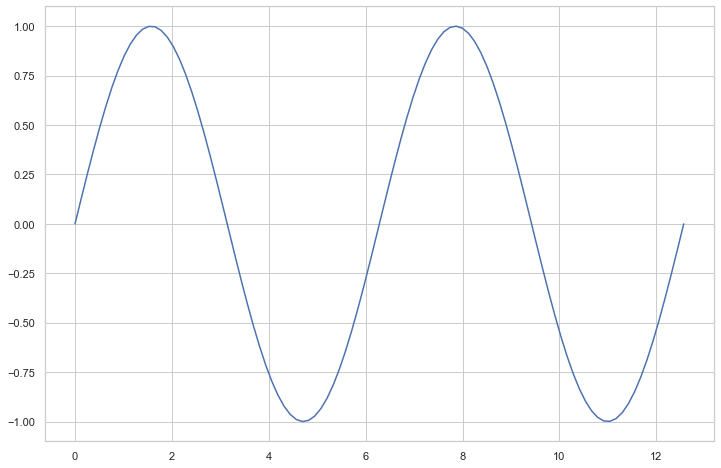

In [377]:
x, dx = np.linspace(0,4*np.pi,100, retstep=True)
y = np.sin(x)
plt.plot(x, y);

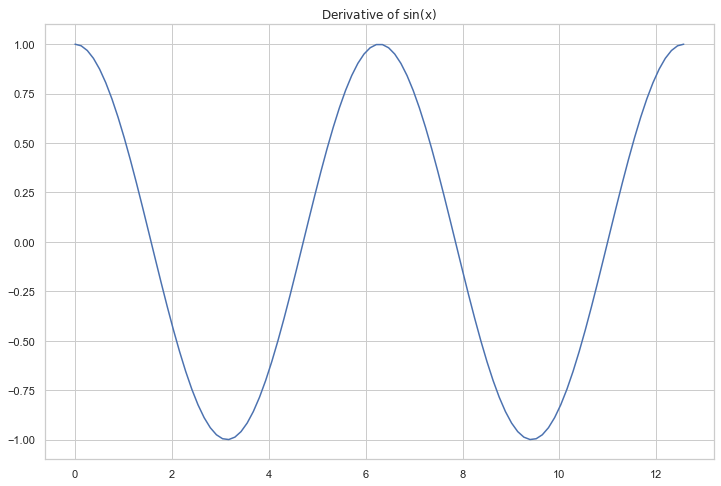

In [378]:

plt.plot(x, np.cos(x),'b')
plt.title(r"$\rm{Derivative\ of}\ \sin(x)$");

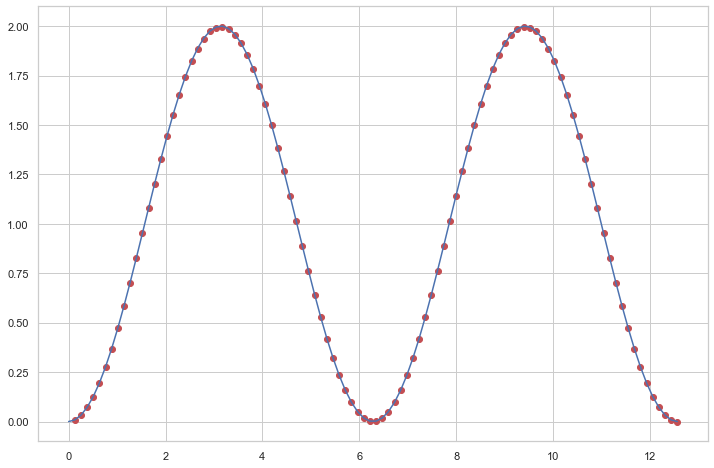

In [379]:
# Compute integral of x numerically
avg_height = 0.5*(y[1:]+y[:-1])
int_sin = np.cumsum(dx*avg_height)
plt.plot(x[1:], int_sin, 'ro', x, np.cos(0)-np.cos(x));

# Multidimensional array

In [380]:
a = np.arange(4*3).reshape(4,3) # NumPy array
l = [[0,1,2],[3,4,5],[6,7,8],[9,10,11]] # Python List

In [381]:
print(a)
print(l)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]


In [382]:
l[-1][-1] # Access to last item

11

In [383]:
print(a[-1,-1])  # Indexing syntax is different with NumPy array
print(a[0,0])    # returns the first item
print(a[1,:])    # returns the second line

11
0
[3 4 5]


In [384]:
print(a[1]) # second line with 2d array
print(a[:,-1])  # last column

[3 4 5]
[ 2  5  8 11]


### Exercise: Create the following arrays
```python
[100 101 102 103 104 105 106 107 108 109]
```
Hint: np.arange
```python
[-2. -1.8 -1.6 -1.4 -1.2 -1. -0.8 -0.6 -0.4 -0.2 0. 
0.2 0.4 0.6 0.8 1. 1.2 1.4 1.6 1.8]
```
Hint: np.linspace
```python
[[ 0.001	0.00129155 0.0016681 0.00215443 0.00278256 
     0.003593810.00464159 0.00599484 0.00774264 0.01]
```
Hint: np.logspace
```python
[[ 0. 0. -1. -1. -1.] 
 [ 0. 0.  0. -1. -1.] 
 [ 0. 0.  0.  0. -1.]
 [ 0. 0.  0.  0.  0.]
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.]]
```
Hint: np.tri, np.zeros, np.transpose

```python
[[ 0.  1.  2.  3. 4.] 
 [-1.  0.  1.  2. 3.] 
 [-1. -1.  0.  1. 2.] 
 [-1. -1. -1.  0. 1.] 
 [-1. -1. -1. -1. 0.]]
```
Hint: np.ones, np.diag


### Exercise 
- We compute numerically the Laplace Equation Solution using Finite Difference Method
- Replace the computation of the discrete form of Laplace equation with numpy arrays
$$
T_{i,j} = \frac{1}{4} ( T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1})
$$
- The function numpy.allclose can help you to compute the residual.

(2457, 1.0022293826789268e-05)
iterations =  2457
CPU times: user 59.4 s, sys: 1.44 s, total: 1min
Wall time: 1min 2s


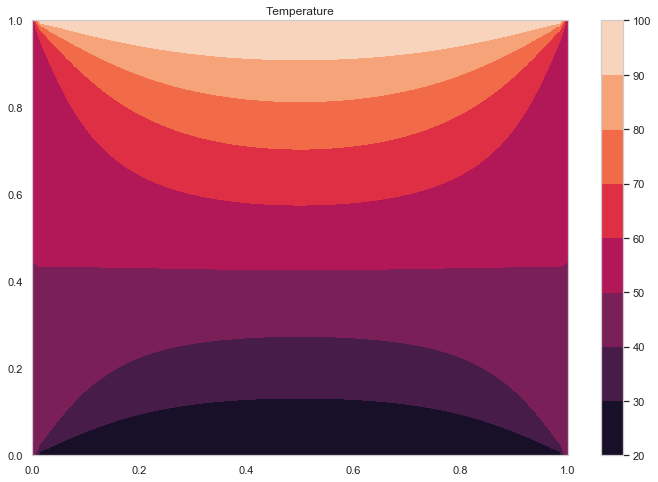

In [385]:
%%time
# Boundary conditions
Tnorth, Tsouth, Twest, Teast = 100, 20, 50, 50

# Set meshgrid
n, l = 64, 1.0
X, Y = np.meshgrid(np.linspace(0,l,n), np.linspace(0,l,n))
T = np.zeros((n,n))

# Set Boundary condition
T[n-1:, :] = Tnorth
T[:1, :]   = Tsouth
T[:, n-1:] = Teast
T[:, :1]   = Twest

residual = 1.0   
istep = 0
while residual > 1e-5 :
    istep += 1
    print ((istep, residual), end="\r")
    residual = 0.0   
    for i in range(1, n-1):
        for j in range(1, n-1):
            T_old = T[i,j]
            T[i, j] = 0.25 * (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1])
            if T[i,j]>0:
                residual=max(residual,abs((T_old-T[i,j])/T[i,j]))


print()
print("iterations = ",istep)
plt.title("Temperature")
plt.contourf(X, Y, T)
plt.colorbar()


iterations =  4337


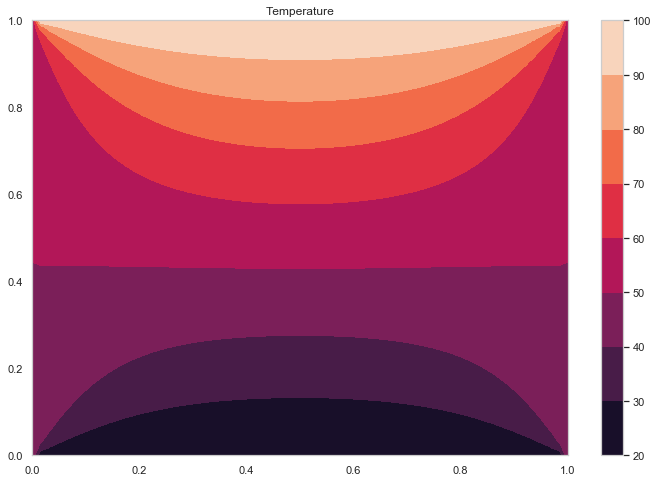

In [386]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Boundary conditions
Tnorth, Tsouth, Twest, Teast = 100, 20, 50, 50

# Set meshgrid
n, l = 64, 1.0
X, Y = np.meshgrid(np.linspace(0,l,n), np.linspace(0,l,n))
T = np.zeros((n,n))

# Set Boundary condition
T[n-1:, :] = Tnorth
T[:1, :] = Tsouth
T[:, n-1:] = Teast
T[:, :1] = Twest

for istep in itertools.count():
    T_old = T[1:-1,1:-1]
    T_new = (T[1:-1,2:]+T[2:,1:-1]+T[1:-1,:-2]+T[:-2,1:-1])*0.25
    if np.allclose(T_new, T_old, rtol=1e-5): break
    T[1:-1,1:-1] = T_new

print()
print("iterations = ",istep)
plt.title("Temperature")
plt.contourf(X, Y, T)
plt.colorbar()

# Arrays to ASCII files


In [387]:
x = y = z = np.arange(0.0,5.0,1.0)

In [388]:
np.savetxt('test.out', (x,y,z), delimiter=',')   # X is an array
%cat test.out

0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00,4.000000000000000000e+00
0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00,4.000000000000000000e+00
0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00,4.000000000000000000e+00


In [389]:
np.savetxt('test.out', (x,y,z), fmt='%1.4e')   # use exponential notation
%cat test.out

0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00
0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00
0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00


# Arrays from ASCII files

In [390]:
np.loadtxt('test.out')

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

- [save](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.save.html#numpy.save): Save an array to a binary file in NumPy .npy format
- [savez](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.savez.html#numpy.savez) : Save several arrays into an uncompressed .npz archive
- [savez_compressed](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.savez_compressed.html#numpy.savez_compressed): Save several arrays into a compressed .npz archive
- [load](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.load.html#numpy.load): Load arrays or pickled objects from .npy, .npz or pickled files.

## H5py

Pythonic interface to the HDF5 binary data format. [h5py user manual](http://docs.h5py.org)

In [391]:
import h5py as h5

with h5.File('test.h5','w') as f:
    f['x'] = x
    f['y'] = y
    f['z'] = z

In [392]:
with h5.File('test.h5','r') as f:
    for field in f.keys():
        print(field+':',f.get(field))

x: <HDF5 dataset "x": shape (5,), type "<f8">
y: <HDF5 dataset "y": shape (5,), type "<f8">
z: <HDF5 dataset "z": shape (5,), type "<f8">


# Slices Are References
- Slices are references to memory in the original array.
- Changing values in a slice also changes the original array.


In [393]:
a = np.arange(10)
b = a[3:6]
b  # `b` is a view of array `a` and `a` is called base of `b`

array([3, 4, 5])

In [394]:
b[0] = -1
a  # you change a view the base is changed.

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

- Numpy does copy only if it is necessary to save memory.

In [395]:
c = a[7:8].copy() # Explicit copy of the array slice
c[0] = -1 
a

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

# Fancy Indexing

In [396]:
a = np.random.randint(20, size=(4, 5))
a

array([[ 2,  3,  4, 17,  0],
       [ 9,  2,  1, 10, 14],
       [ 8,  7, 16, 19, 13],
       [ 5, 10, 15,  4,  9]])

In [397]:
np.random.shuffle(a.flat) # shuffle modify only the first axis
a

array([[ 2,  4, 16, 10, 13],
       [ 9, 17, 14,  0,  8],
       [19,  1,  7,  5,  9],
       [15,  4,  2, 10,  3]])

In [398]:
locations = a % 3 == 0 # locations can be used as a mask
a[locations] = 0 #set to 0 only the values that are divisible by 3
a

array([[ 2,  4, 16, 10, 13],
       [ 0, 17, 14,  0,  8],
       [19,  1,  7,  5,  0],
       [ 0,  4,  2, 10,  0]])

In [399]:
a += a == 0
a

array([[ 2,  4, 16, 10, 13],
       [ 1, 17, 14,  1,  8],
       [19,  1,  7,  5,  1],
       [ 1,  4,  2, 10,  1]])

### `numpy.take`

In [400]:
a = np.fromfunction(lambda i, j: (i+1)*10+j+1, (4, 5), dtype=int)
a

array([[11, 12, 13, 14, 15],
       [21, 22, 23, 24, 25],
       [31, 32, 33, 34, 35],
       [41, 42, 43, 44, 45]])

In [401]:
a[1:3,2:5] # intersection line 1:2 and 2:5

array([[23, 24, 25],
       [33, 34, 35]])

In [402]:
np.take(a,[[6,7],[10,11]])  # Use flatten array indices

array([[22, 23],
       [31, 32]])

# Changing array shape

In [403]:
grid = np.indices((3,5)) # Return an array representing the indices of a grid.
grid[0]

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [404]:
grid[1]

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [405]:
grid.flat[:] # Return a view 

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4])

In [406]:
grid.flatten() # Return a copy

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4])

In [407]:
grid.flatten

<function ndarray.flatten>

In [408]:
np.ravel(grid, order='C') # A copy is made only if needed.

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4])

# Sorting

In [409]:
a=np.array([5,3,6,1,6,7,9,0,8])
np.sort(a) #. Return a view

array([0, 1, 3, 5, 6, 6, 7, 8, 9])

In [410]:
a

array([5, 3, 6, 1, 6, 7, 9, 0, 8])

In [411]:
a.sort() # Change the array inplace
a

array([0, 1, 3, 5, 6, 6, 7, 8, 9])

# Transpose-like operations

In [412]:
a = np.array([5,3,6,1,6,7,9,0,8])
b = a
b.shape = (3,3) # b is a reference so a will be changed

In [413]:
a

array([[5, 3, 6],
       [1, 6, 7],
       [9, 0, 8]])

In [414]:
c = a.T # Return a view so a is not changed
np.may_share_memory(a,c)

True

In [415]:
c[0,0] = -1 # c is stored in same memory so change c you change a
a

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

In [416]:
c  # is a transposed view of a

array([[-1,  1,  9],
       [ 3,  6,  0],
       [ 6,  7,  8]])

In [417]:
b  # b is a reference to a

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

In [418]:
c.base  # When the array is not a view `base` return None

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

# Methods Attached to NumPy Arrays

In [419]:
a = np.arange(20).reshape(4,5)
np.random.shuffle(a.flat)
a

array([[13,  6,  9, 11,  8],
       [10,  7, 18,  1, 17],
       [12,  2,  3,  0, 19],
       [15,  5, 16, 14,  4]])

In [420]:
a = (a - a.mean())/ a.std() # Standardize the matrix
print(a)

[[ 0.607  -0.607  -0.0867  0.2601 -0.2601]
 [ 0.0867 -0.4336  1.4741 -1.4741  1.3007]
 [ 0.4336 -1.3007 -1.1272 -1.6475  1.6475]
 [ 0.9538 -0.7804  1.1272  0.7804 -0.9538]]


In [421]:
np.set_printoptions(precision=4)
print(a)

[[ 0.607  -0.607  -0.0867  0.2601 -0.2601]
 [ 0.0867 -0.4336  1.4741 -1.4741  1.3007]
 [ 0.4336 -1.3007 -1.1272 -1.6475  1.6475]
 [ 0.9538 -0.7804  1.1272  0.7804 -0.9538]]


In [422]:
a.argmax() # max position in the memory contiguous array

14

In [423]:
np.unravel_index(a.argmax(),a.shape) # get position in the matrix

(2, 4)

# Array Operations over a given axis

In [424]:
a = np.arange(20).reshape(5,4)
#np.random.shuffle(a.flat)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [425]:
a.sum(axis=0) # sum of each column

array([40, 45, 50, 55])

In [426]:
a == 10

array([[False, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False, False, False, False]])

In [427]:
np.apply_along_axis(sum, axis=0, arr=a)

array([40, 45, 50, 55])

In [428]:
np.apply_along_axis(sorted, axis=0, arr=a)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

You can replace the `sorted` builtin fonction by a user defined function.

In [429]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [430]:
a = np.diag(range(4))
a

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

# Compute distances

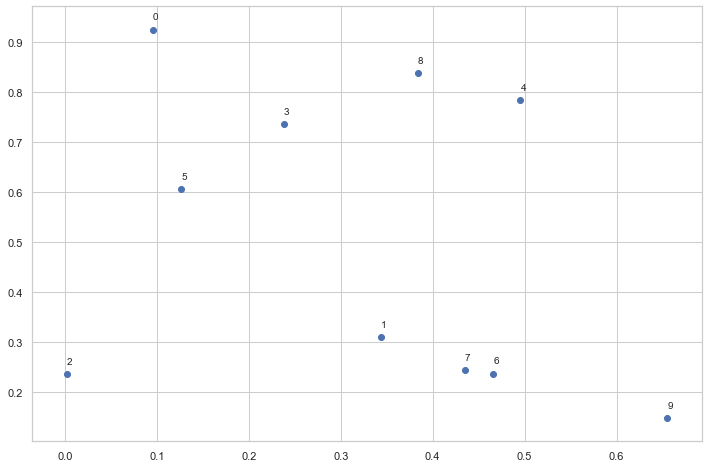

In [431]:
rng = np.random.RandomState(1111)
X = rng.rand(10,2)
plt.scatter(X[:,0], X[:,1])
for (i,x) in enumerate(X):
    plt.text(x[0], x[1]+0.02, str(i))

In [432]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences

array([[[ 0.    ,  0.    ],
        [-0.248 ,  0.6145],
        [ 0.0935,  0.6894],
        [-0.1422,  0.1891],
        [-0.3999,  0.1406],
        [-0.031 ,  0.3184],
        [-0.3706,  0.6879],
        [-0.3396,  0.6813],
        [-0.2883,  0.0866],
        [-0.5596,  0.7766]],

       [[ 0.248 , -0.6145],
        [ 0.    ,  0.    ],
        [ 0.3416,  0.0749],
        [ 0.1058, -0.4254],
        [-0.1519, -0.4739],
        [ 0.2171, -0.2962],
        [-0.1225,  0.0733],
        [-0.0916,  0.0668],
        [-0.0403, -0.5279],
        [-0.3116,  0.162 ]],

       [[-0.0935, -0.6894],
        [-0.3416, -0.0749],
        [ 0.    ,  0.    ],
        [-0.2358, -0.5003],
        [-0.4935, -0.5488],
        [-0.1245, -0.3711],
        [-0.4641, -0.0015],
        [-0.4331, -0.0081],
        [-0.3818, -0.6028],
        [-0.6532,  0.0871]],

       [[ 0.1422, -0.1891],
        [-0.1058,  0.4254],
        [ 0.2358,  0.5003],
        [ 0.    ,  0.    ],
        [-0.2577, -0.0485],
        [ 0.11

In [433]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences

array([[[0.0000e+00, 0.0000e+00],
        [6.1516e-02, 3.7764e-01],
        [8.7496e-03, 4.7528e-01],
        [2.0233e-02, 3.5754e-02],
        [1.5994e-01, 1.9762e-02],
        [9.5834e-04, 1.0135e-01],
        [1.3732e-01, 4.7317e-01],
        [1.1533e-01, 4.6421e-01],
        [8.3112e-02, 7.5013e-03],
        [3.1319e-01, 6.0304e-01]],

       [[6.1516e-02, 3.7764e-01],
        [0.0000e+00, 0.0000e+00],
        [1.1667e-01, 5.6073e-03],
        [1.1190e-02, 1.8100e-01],
        [2.3072e-02, 2.2463e-01],
        [4.7118e-02, 8.7718e-02],
        [1.5018e-02, 5.3795e-03],
        [8.3880e-03, 4.4630e-03],
        [1.6214e-03, 2.7870e-01],
        [9.7102e-02, 2.6254e-02]],

       [[8.7496e-03, 4.7528e-01],
        [1.1667e-01, 5.6073e-03],
        [0.0000e+00, 0.0000e+00],
        [5.5593e-02, 2.5032e-01],
        [2.4350e-01, 3.0122e-01],
        [1.5499e-02, 1.3768e-01],
        [2.1540e-01, 2.3636e-06],
        [1.8762e-01, 6.5235e-05],
        [1.4579e-01, 3.6337e-01],
        [4

In [434]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq

array([[0.    , 0.4392, 0.484 , 0.056 , 0.1797, 0.1023, 0.6105, 0.5795,
        0.0906, 0.9162],
       [0.4392, 0.    , 0.1223, 0.1922, 0.2477, 0.1348, 0.0204, 0.0129,
        0.2803, 0.1234],
       [0.484 , 0.1223, 0.    , 0.3059, 0.5447, 0.1532, 0.2154, 0.1877,
        0.5092, 0.4342],
       [0.056 , 0.1922, 0.3059, 0.    , 0.0688, 0.0291, 0.3009, 0.2813,
        0.0318, 0.5193],
       [0.1797, 0.2477, 0.5447, 0.0688, 0.    , 0.1677, 0.3004, 0.2961,
        0.0154, 0.43  ],
       [0.1023, 0.1348, 0.1532, 0.0291, 0.1677, 0.    , 0.2519, 0.227 ,
        0.1199, 0.4895],
       [0.6105, 0.0204, 0.2154, 0.3009, 0.3004, 0.2519, 0.    , 0.001 ,
        0.3683, 0.0436],
       [0.5795, 0.0129, 0.1877, 0.2813, 0.2961, 0.227 , 0.001 , 0.    ,
        0.3563, 0.0575],
       [0.0906, 0.2803, 0.5092, 0.0318, 0.0154, 0.1199, 0.3683, 0.3563,
        0.    , 0.5497],
       [0.9162, 0.1234, 0.4342, 0.5193, 0.43  , 0.4895, 0.0436, 0.0575,
        0.5497, 0.    ]])

In [435]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 8 5 4 1 2 7 6 9]
 [1 7 6 2 9 5 3 4 8 0]
 [2 1 5 7 6 3 9 0 8 4]
 [3 5 8 0 4 1 7 6 2 9]
 [4 8 3 5 0 1 7 6 9 2]
 [5 3 0 8 1 2 4 7 6 9]
 [6 7 1 9 2 5 4 3 8 0]
 [7 6 1 9 2 5 3 4 8 0]
 [8 4 3 0 5 1 7 6 2 9]
 [9 6 7 1 4 2 5 3 8 0]]


In [436]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[0 3 8 5 4 1 6 7 2 9]
 [1 7 6 2 9 5 3 4 8 0]
 [2 1 5 7 6 9 3 0 8 4]
 [3 5 8 0 4 1 6 7 2 9]
 [8 4 3 5 0 1 6 7 2 9]
 [3 5 0 8 1 2 4 7 6 9]
 [6 7 1 9 2 5 4 3 8 0]
 [7 6 1 9 2 5 3 4 8 0]
 [3 4 8 0 1 5 6 7 2 9]
 [9 6 7 1 4 5 3 2 8 0]]


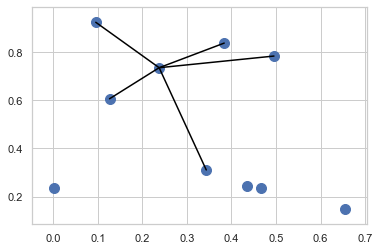

In [437]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 5

i=3
for j in nearest_partition[i, :K+1]:
    # plot a line from X[i] to X[j]
    # use some zip magic to make it happen:
    
    plt.plot(*zip(X[j], X[i]), color='black')

# Views and Memory Management
- If it exists one view of a NumPy array, it can be destroyed.


In [438]:
big = np.arange(1000000)
small = big[:5]
del big
small.base

array([     0,      1,      2, ..., 999997, 999998, 999999])

- Array called `big` is still allocated.
- Sometimes it is better to create a copy.

In [439]:
big = np.arange(1000000)
small = big[:5].copy()
del big
print(small.base)

None


## Change memory alignement

In [440]:
del(a)
a = np.random.randint(20, size=(5,4))
a

array([[ 2,  9, 18, 15],
       [ 5,  3,  3, 12],
       [ 9,  4, 11, 18],
       [ 2,  2, 15,  5],
       [ 2,  0, 15, 14]])

In [441]:
print(a.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [442]:
b = np.asfarray(a) # makes a copy
b.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [443]:
c = np.ravel(a)
c.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [444]:
c.base

array([[ 2,  9, 18, 15],
       [ 5,  3,  3, 12],
       [ 9,  4, 11, 18],
       [ 2,  2, 15,  5],
       [ 2,  0, 15, 14]])

In [445]:
c.base is a

True

# Broadcasting rules

Broadcasting rules allow you to make an outer product between two vectors: the first method involves array tiling, the second one involves broadcasting. The last method is significantly faster.


In [446]:
n = 1000
a = np.arange(n)
ac = a[:, np.newaxis]   # column matrix
ar = a[np.newaxis, :]   # row matrix

In [447]:
%timeit np.tile(a, (n,1)).T * np.tile(a, (n,1))

17.6 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [448]:
%timeit ac * ar

3.43 ms ± 291 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [449]:
np.all(np.tile(a, (n,1)).T * np.tile(a, (n,1)) == ac * ar)

True

## StructuredArray using a compound data type specification

In [450]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [451]:
data['name'] = ['Pierre', 'Paul', 'Jacques', 'Francois']
data['age'] = [45, 10, 71, 39]
data['weight'] = [95.0, 75.0, 88.0, 71.0]
print(data)

[('Pierre', 45, 95.) ('Paul', 10, 75.) ('Jacques', 71, 88.)
 ('Francois', 39, 71.)]


## RecordArray

In [452]:
data_rec = data.view(np.recarray)
data_rec.age

array([45, 10, 71, 39], dtype=int32)

# NumPy Array Programming
- Array operations are fast, Python loops are slow. 
- Top priority: **avoid loops**
- It’s better to do the work three times witharray operations than once with a loop.
- This does require a change of habits.
- This does require some experience.
- NumPy’s array operations are designed to make this possible.

# initialize a random normal vector with 100 values

In [453]:
n = 100
mu, sigma = 0, 1.0
X = np.random.normal(mu, sigma, n)
X

array([ 0.9988,  0.7623, -1.1921, -0.419 ,  0.0142, -0.4436,  1.0104,
        0.8403,  1.5158,  0.2492,  0.086 ,  0.2579, -0.3743,  0.997 ,
       -2.6234,  0.0601,  1.6295, -0.0412,  0.465 ,  1.8296,  0.8868,
       -0.0298, -0.9745, -1.0365,  1.2049, -1.428 , -1.2564,  0.0701,
       -1.5007,  1.297 ,  0.1688, -0.1932,  0.6457,  0.5077,  1.993 ,
       -1.2886,  0.6352,  1.24  ,  0.1397, -1.5207,  0.0182,  1.8153,
        0.1599, -0.1472, -0.8075, -0.6753,  0.3854, -0.5296, -0.7123,
        1.7499,  1.1315,  0.1508,  0.1746,  0.141 , -1.2032, -0.018 ,
       -1.6889, -1.264 , -0.01  , -1.0628, -0.3365, -0.6756, -0.3446,
       -0.6353,  0.5248,  0.8403, -0.2193, -1.7265, -1.053 ,  1.0275,
       -1.8395,  1.0268, -1.7824,  0.5936,  0.4173, -0.6851,  0.1964,
       -0.2667, -1.6916, -0.5543,  0.9194, -0.8105,  1.3731, -0.2899,
       -1.6655,  0.1429,  1.3298,  0.3257, -0.4314,  0.7769,  0.7834,
        1.184 , -1.1501,  0.0379, -0.0122, -0.5904,  0.1118,  0.4348,
        1.8659, -0.2

In [454]:
rng = np.random.RandomState(42)
X = rng.normal(mu, sigma, 100)
X

array([ 0.4967, -0.1383,  0.6477,  1.523 , -0.2342, -0.2341,  1.5792,
        0.7674, -0.4695,  0.5426, -0.4634, -0.4657,  0.242 , -1.9133,
       -1.7249, -0.5623, -1.0128,  0.3142, -0.908 , -1.4123,  1.4656,
       -0.2258,  0.0675, -1.4247, -0.5444,  0.1109, -1.151 ,  0.3757,
       -0.6006, -0.2917, -0.6017,  1.8523, -0.0135, -1.0577,  0.8225,
       -1.2208,  0.2089, -1.9597, -1.3282,  0.1969,  0.7385,  0.1714,
       -0.1156, -0.3011, -1.4785, -0.7198, -0.4606,  1.0571,  0.3436,
       -1.763 ,  0.3241, -0.3851, -0.6769,  0.6117,  1.031 ,  0.9313,
       -0.8392, -0.3092,  0.3313,  0.9755, -0.4792, -0.1857, -1.1063,
       -1.1962,  0.8125,  1.3562, -0.072 ,  1.0035,  0.3616, -0.6451,
        0.3614,  1.538 , -0.0358,  1.5646, -2.6197,  0.8219,  0.087 ,
       -0.299 ,  0.0918, -1.9876, -0.2197,  0.3571,  1.4779, -0.5183,
       -0.8085, -0.5018,  0.9154,  0.3288, -0.5298,  0.5133,  0.0971,
        0.9686, -0.7021, -0.3277, -0.3921, -1.4635,  0.2961,  0.2611,
        0.0051, -0.2

In [455]:
b = np.array([1.0, 2.0]) # numpy array from python list
y = np.random.normal(size=n) +  b[0] + b[1] * X # always element by element operations

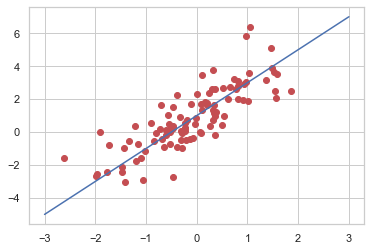

In [456]:
x = np.linspace(-3,3,100) # create a numpy array lineary spaced from -3 to 3 with 100 points
plt.scatter(X, y, c='r')
plt.plot(x, b[0]+b[1]*x, 'b')

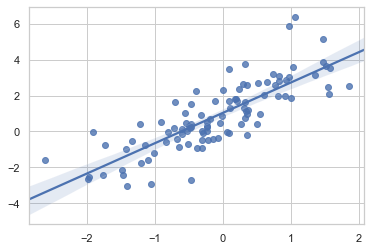

In [457]:
import seaborn as sns
sns.set(style='whitegrid')

sns.regplot(X, y);

In [458]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

X = X[:,np.newaxis] # scikit-learn is waiting for a Matrix

model.fit(X, y)
print('Coefficient: \n', model.coef_)
model.intercept_

Coefficient: 
 [1.6909]


1.0334993922944011

# Linear regression with the classic formula

$$
w = (X^tX)^{-1} X^tY
$$

In [459]:
if ~np.all( X[:,0] == 1.0):
    X = np.insert(X, 0, 1, axis=1) # insert a first column of ones 

X[:10] # first ten lines

array([[ 1.    ,  0.4967],
       [ 1.    , -0.1383],
       [ 1.    ,  0.6477],
       [ 1.    ,  1.523 ],
       [ 1.    , -0.2342],
       [ 1.    , -0.2341],
       [ 1.    ,  1.5792],
       [ 1.    ,  0.7674],
       [ 1.    , -0.4695],
       [ 1.    ,  0.5426]])

In [460]:
X_sq_reg_inv = np.linalg.inv(X.T @ X) # inv(X'X)
w = X_sq_reg_inv.dot(X.T).dot(y)  
# w = (X_sq_reg_inv @ X.T) @ y  
# w = np.dot(np.dot(X_sq_reg_inv, X.T), y)

# Calculate weights by least squares  (using Moore-Penrose pseudoinverse)



In [461]:
U, S, V = np.linalg.svd(X.T.dot(X))
X_sq_reg_inv = V.T.dot(np.diag(1/S)).dot(U.T)
w = X_sq_reg_inv.dot(X.T).dot(y)
w

array([1.0335, 1.6909])

In [462]:
w = np.linalg.pinv(X).dot(y)
w

array([1.0335, 1.6909])

# References
- [NumPy reference](http://docs.scipy.org/doc/numpy/reference/)
- [Getting the Best Performance out of NumPy](http://ipython-books.github.io/featured-01/)
- [Numpy by Konrad Hinsen](http://calcul.math.cnrs.fr/Documents/Ecoles/2013/python/NumPy%20avance.pdf)
- [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)